# Out-of-sample Embedding

Imagine you have a citation network of scholars publishing papers. The nodes are the scholars, and an edge exists in a given pair of scholars if they're published a paper together.

You've already found a representation using ASE or LSE and you have a set of latent positions, which you then clustered to figure out who came from which university. It took a long time for you to get this representation - there are a lot of people doing research out there!

Now, suppose a new graduate student publishes a paper. Your network gets bigger by a single node, and you'd like to find this person's latent position (thus adding them to the clustering system). To do that, however, you'd have to get an entirely new representation for the network. Re-embedding the entire network with the new node added seems like it should be unecessary - after all, you already know the latent positions for every other node.

This section is all about this problem: how to find the representation for new nodes without the computationally expensive task of re-embedding an entire network. As it turns out, there has been some work done, and there is a solution that can get you pretty close the latent position for the new node that you would have had. For more details and formaility, see the 2013 paper "Out-of-sample extension for latent position graphs", by Tang et al (although, as with most science, the theory in this paper was built on top of other work from related fields).

Let's make a network from an SBM, and an additional node that should belong to the first community. Then, we'll embed the network and explore how to find the latent position for the additional node. 

In [2]:
import numpy as np
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices

# Generate parameters
B = np.array([[0.8, 0.2],
              [0.2, 0.8]])

# Generate a network along with community memberships
network, labels = sbm(n=[101, 100], p=B, return_labels=True)
labels = list(labels_)

# Grab out-of-sample vertex
oos_idx = 0
oos_label = labels.pop(oos_idx)
A, a = remove_vertices(network, indices=oos_idx, return_removed=True)

What we have now is a network and an additional node. You can see the adjacency matrix for the network below, along with the adjacency vector for the additional node (Here, an “adjacency vector”  is a vector with a 1 in every position that the out-of-sample node has an edge with an in-sample node). The heatmap on the right is a network with two communities, with 100 nodes in each community. The vector on the right is purple on row $i$ if the $i^{th}$ in-sample node is connected to the out-of-sample node.

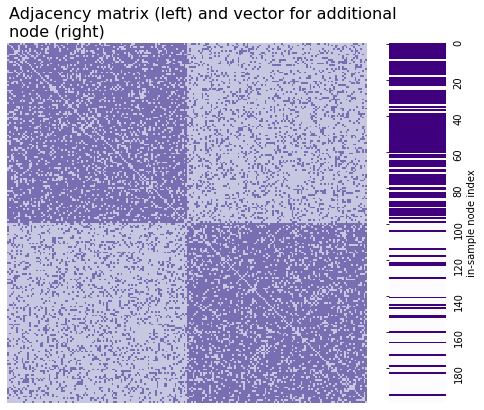

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from graphbook_code import heatmap
from graphbook_code.plotting import cmaps

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

# heatmap
heatmap(A, ax=ax, cbar=False)

# adjacency vector
ax = fig.add_axes([.85, 0, .1, 1])
cmap = cmaps["sequential"]
plot = sns.heatmap(a[:, np.newaxis], ax=ax, cbar=False, cmap=cmap, xticklabels=False, yticklabels=20)
plt.tick_params(axis='y', labelsize=10, labelleft=False, labelright=True)
plt.ylabel("in-sample node index")
plot.yaxis.set_label_position("right")

# title
fig.suptitle("Adjacency matrix (left) and vector for additional \nnode (right)", y=1.1, fontsize=16, x=.19, ha="left");

After embedding with ASE, we have an embedding for the original network - so our rows contain the latent position for each original node - but we still don't have anything for our new node.

In [86]:
from graspologic.embed import AdjacencySpectralEmbed as ASE

ase = ASE(n_components=2)
ase.fit(A)
X = ase.transform(A)

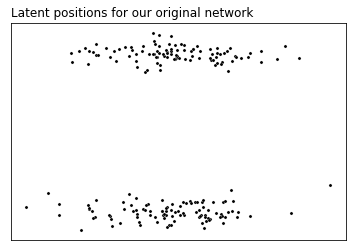

In [87]:
from graphbook_code import plot_latents
plot_latents(X, title="Latent positions for our original network");

In [95]:
from numpy.linalg import pinv

np_pinv = pinv(X)
ase._pinv_left.T[:, :5]

array([[0.00736528, 0.00700151, 0.00689389, 0.00753227, 0.00675647],
       [0.00847618, 0.00874595, 0.00915071, 0.00835613, 0.0076026 ]])

In [96]:
np_pinv[:, :5]

array([[0.00740115, 0.00703738, 0.0069299 , 0.00756818, 0.00679244],
       [0.00854566, 0.00882142, 0.00923125, 0.00842319, 0.00767085]])